**[Problem 1] Data acquisition**

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

data = load_iris()
X = pd.DataFrame(data = data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

Y = pd.DataFrame(data=data.target, columns=['Species'])

X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**[Problem 2] Combining data**

In [4]:
df = pd.concat([X, Y], axis=1, join="inner")
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**[Problem 3] Checking the data**

In [5]:
df.values[4]

array([5. , 3.6, 1.4, 0.2, 0. ])

In [6]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [7]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**[Problem 4] Examining the iris dataset itself**

**[Problem 5] Extracting the required data**

Extract sepal_width, columns in three different ways

In [9]:
df.sepal_width
df[['sepal_width']]
df.loc[:, 'sepal_width'] # use name of column
df.iloc[:, 1] # use index

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

Extract the 50th to 99th data

In [10]:
df.loc[50:99, :].head()

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df.loc[50:99, 'petal_length'].head()

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal_length, dtype: float64

In [12]:
df.query('petal_width == 0.2').head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**[Problem 6] Creating a diagram**

Make a pie chart of the number of samples per label (while showing percentages)

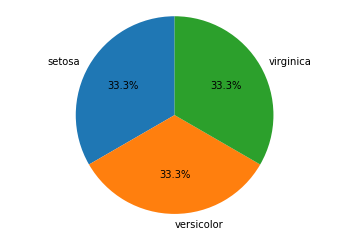

In [13]:
import matplotlib.pyplot as plt

sizes = df.Species.value_counts() # count of each lable
labels = data.target_names # label name

fig1, ax1 = plt.subplots()

# autopct: display the percentage
ax1.pie(sizes, labels=labels, startangle=90,  autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Select features one by one and visualize the distribution of data for each label using a box plot

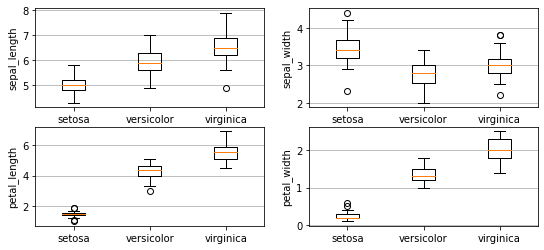

In [14]:
#plt.boxplot(df.sepal_length.groupby(by="Species"), labels=data.target_names)

setosa = df.query('Species == 0')
virginica = df.query('Species == 1')
versicolor = df.query('Species == 2')

sepal_length = [setosa.sepal_length, virginica.sepal_length, versicolor.sepal_length]
sepal_width = [setosa.sepal_width, virginica.sepal_width, versicolor.sepal_width]
petal_length = [setosa.petal_length, virginica.petal_length, versicolor.petal_length]
petal_width = [setosa.petal_width, virginica.petal_width, versicolor.petal_width]

labels = data.target_names

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 4))

bplot1 = ax1.boxplot(x=sepal_length, labels=labels)
bplot2 = ax2.boxplot(x=sepal_width, labels=labels)
bplot3 = ax3.boxplot(x=petal_length, labels=labels)
bplot4 = ax4.boxplot(x=petal_width, labels=labels)

# display y grid
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
ax4.yaxis.grid(True)

# set y label - vertical
ax1.set_ylabel('sepal_length')
ax2.set_ylabel('sepal_width')
ax3.set_ylabel('petal_length')
ax4.set_ylabel('petal_width')

plt.show()

Select features one by one and visualize the distribution of data for each label using a violin plot

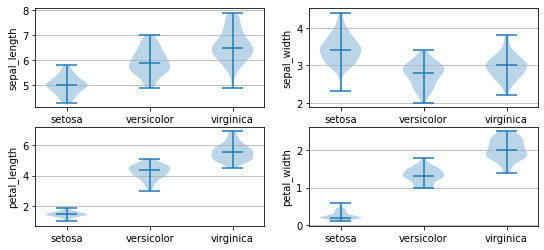

In [15]:
fig1, ((ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 4))
allDatas = [sepal_length, sepal_width, petal_length, petal_width]
i = 0
ylabels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for ax in [ax5, ax6, ax7, ax8]:
    ax.yaxis.grid(True)
    ax.violinplot(allDatas[i], showmeans=False, showmedians=True)

    # set x labels 
    plt.setp(ax, xticks=[y + 1 for y in range(len(allDatas[i]))],
            xticklabels=['setosa', 'versicolor', 'virginica'])

    # set y labels
    ax.set_ylabel(ylabels[i])

    i += 1

plt.show()

Text(0, 0.5, 'petal_width')

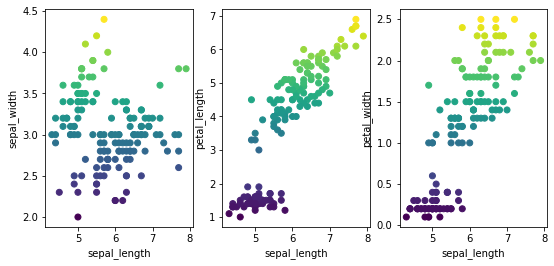

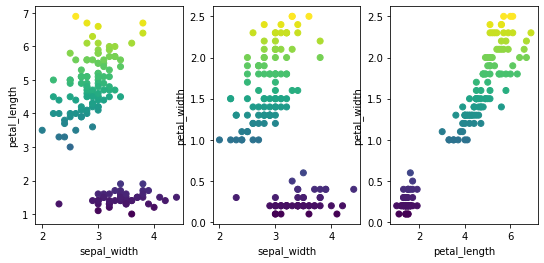

In [21]:
fig2, (ax9, ax10,ax11) = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
ax9.scatter(x=sepal_length, y=sepal_width, c=sepal_width)
ax9.set_xlabel('sepal_length')
ax9.set_ylabel('sepal_width')

ax10.scatter(x=sepal_length, y=petal_length, c=petal_length)
ax10.set_xlabel('sepal_length')
ax10.set_ylabel('petal_length')

ax11.scatter(x=sepal_length, y=petal_width, c=petal_width)
ax11.set_xlabel('sepal_length')
ax11.set_ylabel('petal_width')

fig3, (ax12, ax13,ax14) = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))

ax12.scatter(x=sepal_width, y=petal_length, c=petal_length)
ax12.set_xlabel('sepal_width')
ax12.set_ylabel('petal_length')

ax13.scatter(x=sepal_width, y=petal_width, c=petal_width)
ax13.set_xlabel('sepal_width')
ax13.set_ylabel('petal_width')

ax14.scatter(x=petal_length, y=petal_width, c=petal_width)
ax14.set_xlabel('petal_length')
ax14.set_ylabel('petal_width')

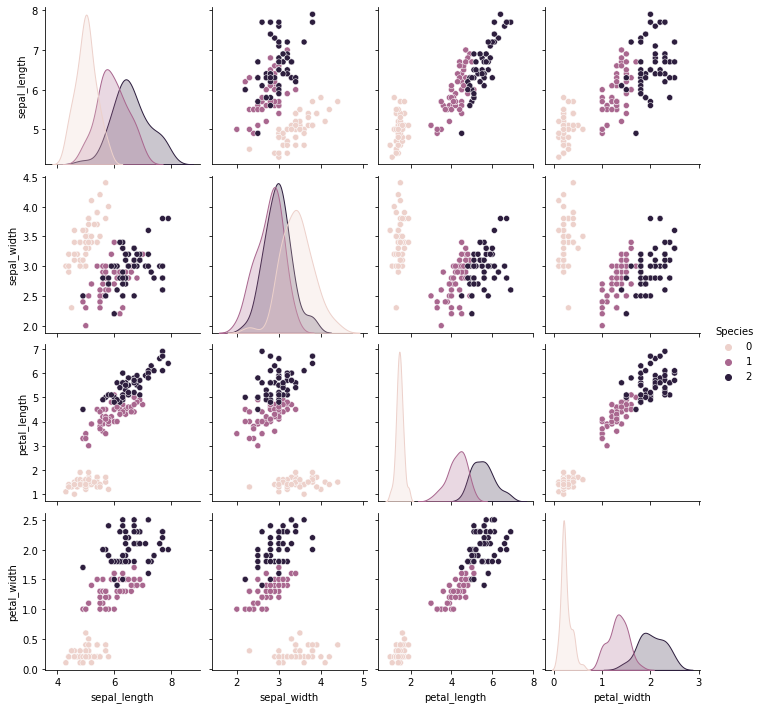

In [17]:
sns.pairplot(df, hue='Species')

Create a correlation coefficient matrix for 4 features

In [18]:
corrMt = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']].corr()
corrMt

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Make a heat map of the correlation coefficient matrix (1)

<AxesSubplot:>

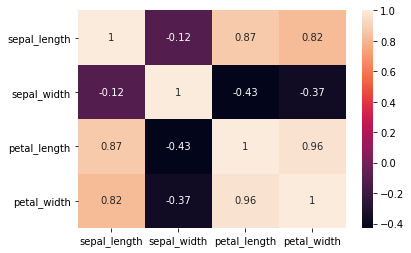

In [19]:
sns.heatmap(corrMt, annot=True)

**[Problem 8] Explaining the results of visualized graphs and tables**


- Viriginica usually has large sepal_length, petal_length and petal_width
- Setosa usually has small sepal_length, petal_length, petal_width but large sepal_width
- Versicolor has medium sepal_length, petal_length, petal_width but small sepal_width 
